In [2]:
"""
MC post analysis
"""

'\nMC post analysis\n'

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rcParams
import pandas as pd

In [76]:
plt.style.use('classic')
plt.style.use('seaborn-bright')
rcParams.update({"legend.handletextpad": 0.3,
                 "legend.labelspacing": 0.3,
                 "legend.fontsize": 12,
                 "legend.markerscale":1.2,
                 "legend.frameon": True,
                 "legend.numpoints": 1,
                 "xtick.top": 1,
                 "xtick.bottom": 1,
                 "ytick.left": 1,
                 "ytick.right": 1,
                 "savefig.dpi": 300.0,
                })
"""
                 "axes.labelsize":15,
                 "xtick.labelsize":14,
                 "ytick.labelsize":14,
                 "xtick.major.pad":8,
                 "xtick.direction": 'in',
                 "ytick.direction": 'in',
                 "xtick.minor.visible": True,
                 "ytick.minor.visible": True,
                 })
"""

'\n                 "axes.labelsize":15,\n                 "xtick.labelsize":14,\n                 "ytick.labelsize":14,\n                 "xtick.major.pad":8,\n                 "xtick.direction": \'in\',\n                 "ytick.direction": \'in\',\n                 "xtick.minor.visible": True,\n                 "ytick.minor.visible": True,\n                 })\n'

In [104]:
def initialize(nlist,L,N):       
    """get neighbors of each sites
    """             
    for i in range(N):
        nlist[i][0] = (i-1)%N
        nlist[i][1] = (i-L)%N
        nlist[i][2] = (i+1)%N
        nlist[i][3] = (i+L)%N   
    return nlist

def measure(J,spin,nlist,N,Nobs):
    
    observable=np.zeros(Nobs, dtype=np.float64)
    
    observable[0] = np.sum(spin)  # magnetization 
    for i in range(N):
        tmp = J * spin[i] * (spin[nlist[i][0]] + spin[nlist[i][1]]) 
        observable[1] = observable[1] + tmp
    observable[1] = observable[1]  # energy
    observable[2] = observable[0]**2  # m^2
    observable[3] = observable[1]**2    # e^2

    return observable

In [117]:
def init_datapath(loc, L):
    """init the data file path in an directory Ll
    loc: Local or Wolff
    """
    dirpath = os.path.join(os.getcwd(), '%s/L%i'%(loc,L))
    data_p = {}
    data_o = {}
    for file in os.listdir(dirpath):
        if "spinconf" in file:
            tem = file[file.index('T')+1:file.index('T')+7]
            data_p[tem] = os.path.join(dirpath, file) # store file path
        if "observation" in file:
            tem = file[file.index('T')+1:file.index('T')+7]
            data_o[tem] = os.path.join(dirpath, file) # store file path
    return data_p, data_o

"""load data from pandas"""
def read_single_Ising(datapath):
    df = pd.read_csv(datapath)
    configmat = [] # M*N matrix. N: sites; M: measure steps
    for mcstep in df.keys():
        configmat.append( df[mcstep] )
    return np.array(configmat, dtype=np.int8)

def recalc_obser(L, tem, data_p, start_m=1, Nobs=4):
    print('read',data_p['%.4f'%tem])
    confs = read_single_Ising(data_p['%.4f'%tem]) # <<< 2.0000
    N = L**2; J = -1
    nlist = np.zeros([N,4], dtype=np.int64)
    nlist = initialize(nlist,L,N)
    Nmcstep = confs.shape[0] - start_m
    obser = np.zeros((Nobs, Nmcstep), dtype=np.float64)
    iT=1.0/tem; iT2=iT*iT
    for mcstep, conf in enumerate(confs[1:]):
        M1, E1, M2, E2 = 0,0,0,0
        tmp = measure(J,conf,nlist,N,Nobs)
        M1 += tmp[0]; E1 += tmp[1]
        M2 += tmp[2]; E2 += tmp[3]
        obser[0,mcstep] = E1 / N
        obser[1,mcstep] = M1 / N
        #bser[2,mcstep] = (E2 - E1*E1)*iT2 / N
        #bser[3,mcstep] = (M2 - M1*M1)*iT / N
    print('complete measure')
    return obser

In [136]:
ldata_p1, _ = init_datapath(loc='Local',L=10)
ldata_p2, _ = init_datapath(loc='Local',L=20)
ldata_p4, _ = init_datapath(loc='Local',L=40)
wdata_p1, _ = init_datapath(loc='Wolff',L=10)
wdata_p2, _ = init_datapath(loc='Wolff',L=20)
wdata_p4, _ = init_datapath(loc='Wolff',L=40)
print(ldata_p1.keys())

dict_keys(['1.5000', '1.5600', '1.6200', '1.6800', '1.7400', '1.8000', '1.8600', '1.9200', '1.9800', '2.0400', '2.1000', '2.1600', '2.2200', '2.2800', '2.3400', '2.4000', '2.4600', '2.5200', '2.5800', '2.6400', '2.7000', '2.7600', '2.8200', '2.8800', '2.9400', '3.0000', '3.0600', '3.1200', '3.1800', '3.2400', '3.3000'])


In [119]:
tc = 2/np.log(1+np.sqrt(2))
print(tc)

2.269185314213022


In [120]:
lobsr = [recalc_obser(10, 2.0400, ldata_p1), recalc_obser(20, 2.0400, ldata_p2), recalc_obser(20, 3.0000, ldata_p2)]
wobsr = [recalc_obser(10, 2.0400, wdata_p1), recalc_obser(20, 2.0400, wdata_p2), recalc_obser(20, 3.0000, wdata_p2)]

read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L10\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L20\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L20\spinconf_T3.0000.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Wolff/L20\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Wolff/L20\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Wolff/L20\spinconf_T3.0000.csv
complete measure


<Figure size 640x480 with 0 Axes>

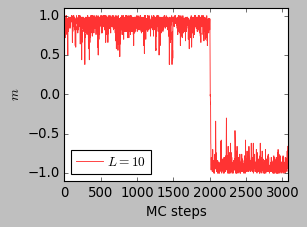

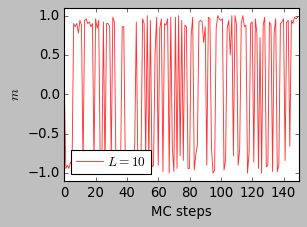

In [126]:
## plot
plt.clf()
fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
ax.plot(lobsr[0][1],label=r'$L=10$',lw=0.8,alpha=0.8,c='r')
ax.set_xlim(0,lobsr[0].shape[1])
plt.xlabel('MC steps')
plt.ylabel(r'$m$')
plt.ylim(-1.1,1.1)
ax.legend(loc='lower left')
fig.savefig('Fig/local m-mc.png')

fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
ax.plot(wobsr[0][1][:150],label=r'$L=10$',lw=0.8,alpha=0.8,c='r')
ax.set_xlim(0,150)
plt.xlabel('MC steps')
plt.ylabel(r'$m$')
plt.ylim(-1.1,1.1)
ax.legend(loc='lower left')
fig.savefig('Fig/wolff m-mc.png')

In [ ]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

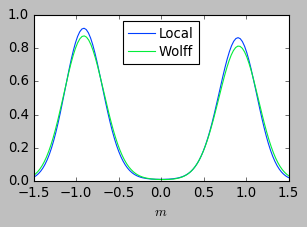

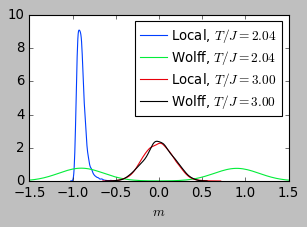

In [135]:
plt.clf()
fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
sns.distplot(lobsr[0][1][1000:],label='Local',ax=ax, hist=False)
sns.distplot(wobsr[0][1][10:],label='Wolff',ax=ax, hist=False)
ax.set_xlim(-1.5,1.5)
plt.xlabel(r'$m$')

fig.savefig('Fig/local-wolff m dist L10.png')

fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
sns.distplot(lobsr[1][1][1000:],label=r'Local, $T/J=2.04$',ax=ax, hist=False)
sns.distplot(wobsr[1][1][10:],label=r'Wolff, $T/J=2.04$',ax=ax, hist=False)
sns.distplot(lobsr[2][1][500:],label=r'Local, $T/J=3.00$',ax=ax, hist=False)
sns.distplot(wobsr[2][1][10:],label=r'Wolff, $T/J=3.00$',color='k',ax=ax, hist=False)
ax.set_xlim(-1.5,1.5)
plt.xlabel(r'$m$')

fig.savefig('Fig/local-wolff m dist L20.png')

In [152]:
"""critical slowing down"""
lobsr_sc = [recalc_obser(10, 2.0400, ldata_p1), recalc_obser(20, 2.0400, ldata_p2), recalc_obser(40, 2.0400, ldata_p4)]
lobsr_c = [recalc_obser(10, 2.28, ldata_p1), recalc_obser(20, 2.28, ldata_p2), recalc_obser(40, 2.28, ldata_p4)]
lobsr_hc = [recalc_obser(10, 3.00, ldata_p1), recalc_obser(20, 3.00, ldata_p2), recalc_obser(40, 3.00, ldata_p4)]
wobsr_sc = [recalc_obser(10, 2.040, wdata_p1), recalc_obser(20, 2.040, wdata_p2), recalc_obser(40, 2.040, wdata_p4)]
wobsr_c = [recalc_obser(10, 2.28, wdata_p1), recalc_obser(20, 2.28, wdata_p2), recalc_obser(40, 2.28, wdata_p4)]
wobsr_hc = [recalc_obser(10, 3.00, wdata_p1), recalc_obser(20, 3.00, wdata_p2), recalc_obser(40, 3.00, wdata_p4)]

read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L10\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L20\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L40\spinconf_T2.0400.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L10\spinconf_T2.2800.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L20\spinconf_T2.2800.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L40\spinconf_T2.2800.csv
complete measure
read C:\Users\xuhan\Documents\School\CityU\Course\Advanced_Computational_method\pca_ising\Program\Local/L10\spinconf_T3.0000

<Figure size 640x480 with 0 Axes>

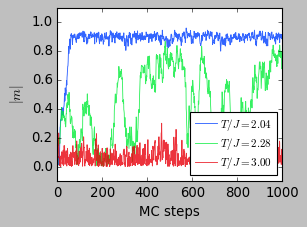

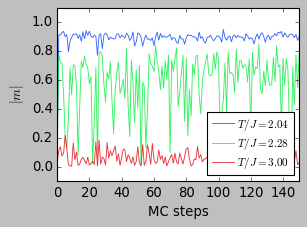

In [165]:
plt.clf()
fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
ax.plot(np.abs(lobsr_sc[-1][1]),label=r'$T/J=2.04$',lw=0.8,alpha=0.8)
ax.plot(np.abs(lobsr_c[-1][1]),label=r'$T/J=2.28$',lw=0.8,alpha=0.8)
ax.plot(np.abs(lobsr_hc[-1][1]),label=r'$T/J=3.00$',lw=0.8,alpha=0.8)
ax.set_xlim(0,1000)
plt.xlabel('MC steps')
plt.ylabel(r'$|m|$')
plt.ylim(-0.1,1.1)
ax.legend(loc='lower right',fontsize=10)
fig.savefig('Fig/local e-mc.png')

fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
ax.plot(np.abs(wobsr_sc[-1][1]),label=r'$T/J=2.04$',lw=0.8,alpha=0.8)
ax.plot(np.abs(wobsr_c[-1][1]),label=r'$T/J=2.28$',lw=0.8,alpha=0.8)
ax.plot(np.abs(wobsr_hc[-1][1]),label=r'$T/J=3.00$',lw=0.8,alpha=0.8)
ax.set_xlim(0,150)
plt.ylim(-0.1,1.1)
plt.xlabel('MC steps')
plt.ylabel(r'$|m|$')
ax.legend(loc='lower right',fontsize=10)
fig.savefig('Fig/wolff e-mc.png')

In [193]:
"""test the autocorrelation"""
def auto_correlation_fft(obsr_ij):
    # obsr_ij is a Markov chain for single parameter
    obsrfft = np.fft.rfft(obsr_ij - np.mean(obsr_ij))
    fm = obsrfft/np.sqrt(len(obsr_ij)) # average
    fm2 = np.abs(fm)**2
    cm = np.fft.irfft(fm2, len(obsr_ij))
    cm_2 = cm / cm[0]
    autocorrelation = cm_2
    return autocorrelation, cm

def get_corr_time(autocorrelation):
    j=0
    log_cm_2 = []
    while autocorrelation[j] > 0 :        
        log_cm_2.append(np.log(autocorrelation[j]))
        j = j+1
    x = np.linspace(0,len(log_cm_2)-1,len(log_cm_2))
    p = np.polyfit(x,log_cm_2,1)
    tau = -1 / p[0]#, correlation = 2*int(np.ceil(tau))
    return log_cm_2, tau

In [210]:
## Metropolis
lobsr_all = [lobsr_sc, lobsr_c, lobsr_hc]
wobsr_all = [wobsr_sc, wobsr_c, wobsr_hc]
log_auto_l, tau_l = [[], [], []], [[], [], []]
log_auto_w, tau_w = [[], [], []], [[], [], []]
for i in range(3): # tid
    for j in range(3): # lid
        print(i,j, 'local')
        obsrs = lobsr_all[i][j]
        autoc, cm = auto_correlation_fft(obsrs[1])
        log_auto, tau = get_corr_time(autoc)
        log_auto_l[i].append(log_auto)
        tau_l[i].append(tau)

        print(i,j, 'wolff')
        obsrs = wobsr_all[i][j]
        autoc, cm = auto_correlation_fft(obsrs[1])
        log_auto = []
        while autoc[j] > 0 :        
            log_auto.append(np.log(autoc[j]))
            j = j+1
        #log_auto, tau = get_corr_time(autoc)
        log_auto_w[i].append(log_auto)
        #tau_w[i].append(tau)


0 0 local
0 0 wolff
0 1 local
0 1 wolff
0 2 local
0 2 wolff
1 0 local
1 0 wolff
1 1 local
1 1 wolff
1 2 local
1 2 wolff
2 0 local
2 0 wolff
2 1 local
2 1 wolff
2 2 local
2 2 wolff


In [197]:
np.array(tau_l)

array([[230.69961996,   8.03331901,  13.72122549],
       [ 83.12215037, 250.95874161,  80.3117543 ],
       [  2.20547146,   2.28205555,   1.97741446]])

<Figure size 640x480 with 0 Axes>

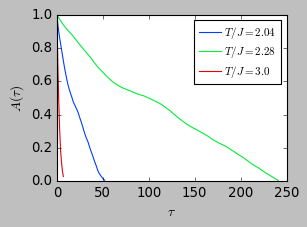

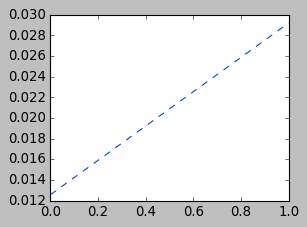

In [211]:
plt.clf()
fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
Ls = [10,20,40]
Ts = [2.04,2.28,3.00]
for i in range(3):
    tij = Ts[i]
    log_auto = log_auto_l[i][-1]
    ax.plot(np.exp(log_auto), label=r'$T/J=%s$'%(tij))

plt.xlabel(r'$\tau$')
plt.ylabel(r'$A(\tau)$')

ax.legend(fontsize=10)
fig.savefig('Fig/local auto.png')


fig, ax = plt.subplots(figsize=(4,3),tight_layout=True)
log_auto = log_auto_w[1][-1]
ax.plot(np.exp(log_auto), '--', label='Wolff')

